<h1>News Article Share Prediction - Exploratory Data Analysis</h1>

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<h3>Loading the Data</h3>

In [2]:
# Loading the dataset into the notebook
data = pd.read_csv('../data/news_share_data.csv')
data.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/14 0:00,0.640816,5,3,1,4.579592,5,...,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/14 0:00,0.549618,4,1,0,4.636704,7,...,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/14 0:00,0.577236,8,1,0,4.627451,7,...,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,4/1/14 0:00,0.525896,4,1,0,5.083665,9,...,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,4/1/14 0:00,0.588889,6,9,0,4.336022,7,...,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


<h3>Data Preprocessing</h3>

In [3]:
# Storing data in variable df
df = data

In [4]:
# The number of columns and rows of the data
df.shape

(1003, 22)

In [5]:
# A look at the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   article_id                  1003 non-null   int64  
 1   title                       1003 non-null   object 
 2   text                        1003 non-null   object 
 3   published_date              1003 non-null   object 
 4   unique_tokens_rate          1003 non-null   float64
 5   num_hrefs                   1003 non-null   int64  
 6   num_imgs                    1003 non-null   int64  
 7   num_videos                  1003 non-null   int64  
 8   average_token_length        1003 non-null   float64
 9   num_keywords                1003 non-null   int64  
 10  data_channel                1003 non-null   object 
 11  min_avg_key                 1003 non-null   float64
 12  max_avg_key                 1003 non-null   float64
 13  avg_avg_key                 1003 

As can be seen above, there are no missing values in the dataset. But, the published date is of type object. It may be in our best interest to convert that to datetime for farther analysis.

In [6]:
# A look at the formatting for published_date
df['published_date'].loc[0:10]

0     3/31/14 0:00
1      4/1/14 0:00
2      4/1/14 0:00
3      4/1/14 0:00
4      4/1/14 0:00
5      4/1/14 0:00
6      4/1/14 0:00
7      4/1/14 0:00
8      4/1/14 0:00
9      4/1/14 0:00
10     4/1/14 0:00
Name: published_date, dtype: object

In [7]:
# Converting the published_date field to a pandas datetime object
df['published_date_cleaned'] = pd.to_datetime(df['published_date'])

In [8]:
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,published_date_cleaned
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/14 0:00,0.640816,5,3,1,4.579592,5,...,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,2014-03-31
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/14 0:00,0.549618,4,1,0,4.636704,7,...,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,2014-04-01
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/14 0:00,0.577236,8,1,0,4.627451,7,...,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,2014-04-01
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,4/1/14 0:00,0.525896,4,1,0,5.083665,9,...,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,2014-04-01
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,4/1/14 0:00,0.588889,6,9,0,4.336022,7,...,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,2014-04-01


In [9]:
# Unique values for the categorical variable data_channel
df['data_channel'].value_counts()

00000            350
Tech             198
Entertainment    185
Business         164
Social Media      55
Lifestyle         51
Name: data_channel, dtype: int64

Data channel is a categorical feature. There is a value of 0000 for articles where it is not clear what the area is. This may become a bit clearer later, but for now, it can just be renamed as misc for miscellaneous. In addition, it's formatting will be made uniform to avoid any errors due to formatting.

In [10]:
# Replacing 00000 with misc for miscellaneous
df['data_channel_cleaned'] = df['data_channel'].replace('00000', 'misc')

In [11]:
# The variable data_channel shall be standardized to ensure uniformity
df['data_channel_cleaned'] = df['data_channel_cleaned'].apply(lambda x: x.lower().strip())

In [12]:
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,published_date_cleaned,data_channel_cleaned
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,3/31/14 0:00,0.640816,5,3,1,4.579592,5,...,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,2014-03-31,business
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,4/1/14 0:00,0.549618,4,1,0,4.636704,7,...,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,2014-04-01,tech
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,4/1/14 0:00,0.577236,8,1,0,4.627451,7,...,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,2014-04-01,tech
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,4/1/14 0:00,0.525896,4,1,0,5.083665,9,...,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,2014-04-01,tech
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,4/1/14 0:00,0.588889,6,9,0,4.336022,7,...,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,2014-04-01,misc


<h3>Univariate Analysis</h3>

The goal of this section is to see the distribution of various fields. In addition, we also need to know on which days most articles were published and the data channels which were most used.

In [13]:
# Using only the cleaned dataset
df_clean = df.drop(['data_channel', 'published_date'], axis=1)
df_clean.head()

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,...,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,published_date_cleaned,data_channel_cleaned
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,Business,...,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,2014-03-31,business
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4,1,0,4.636704,7,Tech,...,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,2014-04-01,tech
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8,1,0,4.627451,7,Tech,...,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,2014-04-01,tech
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4,1,0,5.083665,9,Tech,...,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,2014-04-01,tech
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6,9,0,4.336022,7,00000,...,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,2014-04-01,misc


<AxesSubplot:xlabel='data_channel_cleaned', ylabel='count'>

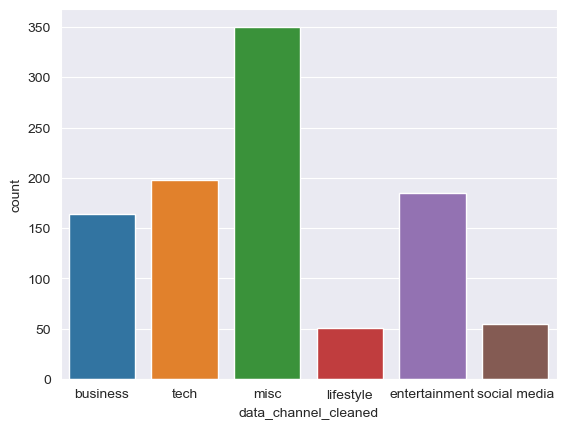

In [17]:
# Countplot showing distribution of data channels
sns.countplot(x=df_clean['data_channel_cleaned'])

Most articles fall under misc followed by tech, entertainment, and business.

<AxesSubplot:xlabel='published_date_cleaned', ylabel='count'>

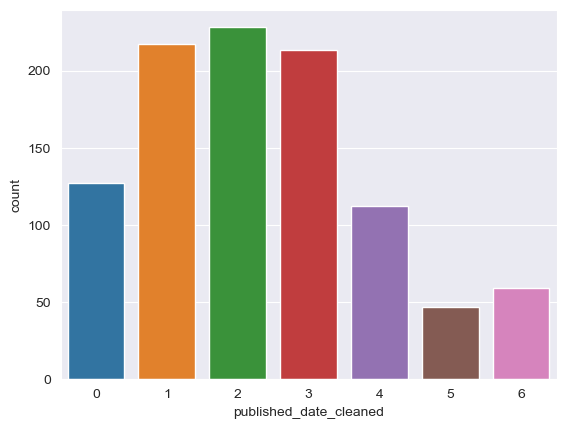

In [15]:
# Countplot showing distribution of days when articles were published.
sns.countplot(x= df_clean.set_index('published_date_cleaned').index.day_of_week)

Most articles are published on Wednesdays (2), followed by Tuesdays (1) and Thursdays (3).

array([[<AxesSubplot:title={'center':'unique_tokens_rate'}>,
        <AxesSubplot:title={'center':'num_hrefs'}>,
        <AxesSubplot:title={'center':'num_imgs'}>,
        <AxesSubplot:title={'center':'num_videos'}>],
       [<AxesSubplot:title={'center':'average_token_length'}>,
        <AxesSubplot:title={'center':'num_keywords'}>,
        <AxesSubplot:title={'center':'min_avg_key'}>,
        <AxesSubplot:title={'center':'max_avg_key'}>],
       [<AxesSubplot:title={'center':'avg_avg_key'}>,
        <AxesSubplot:title={'center':'href_avg_shares'}>,
        <AxesSubplot:title={'center':'global_subjectivity'}>,
        <AxesSubplot:title={'center':'global_sentiment_polarity'}>],
       [<AxesSubplot:title={'center':'global_rate_positive_words'}>,
        <AxesSubplot:title={'center':'global_rate_negative_words'}>,
        <AxesSubplot:title={'center':'title_subjectivity'}>,
        <AxesSubplot:>]], dtype=object)

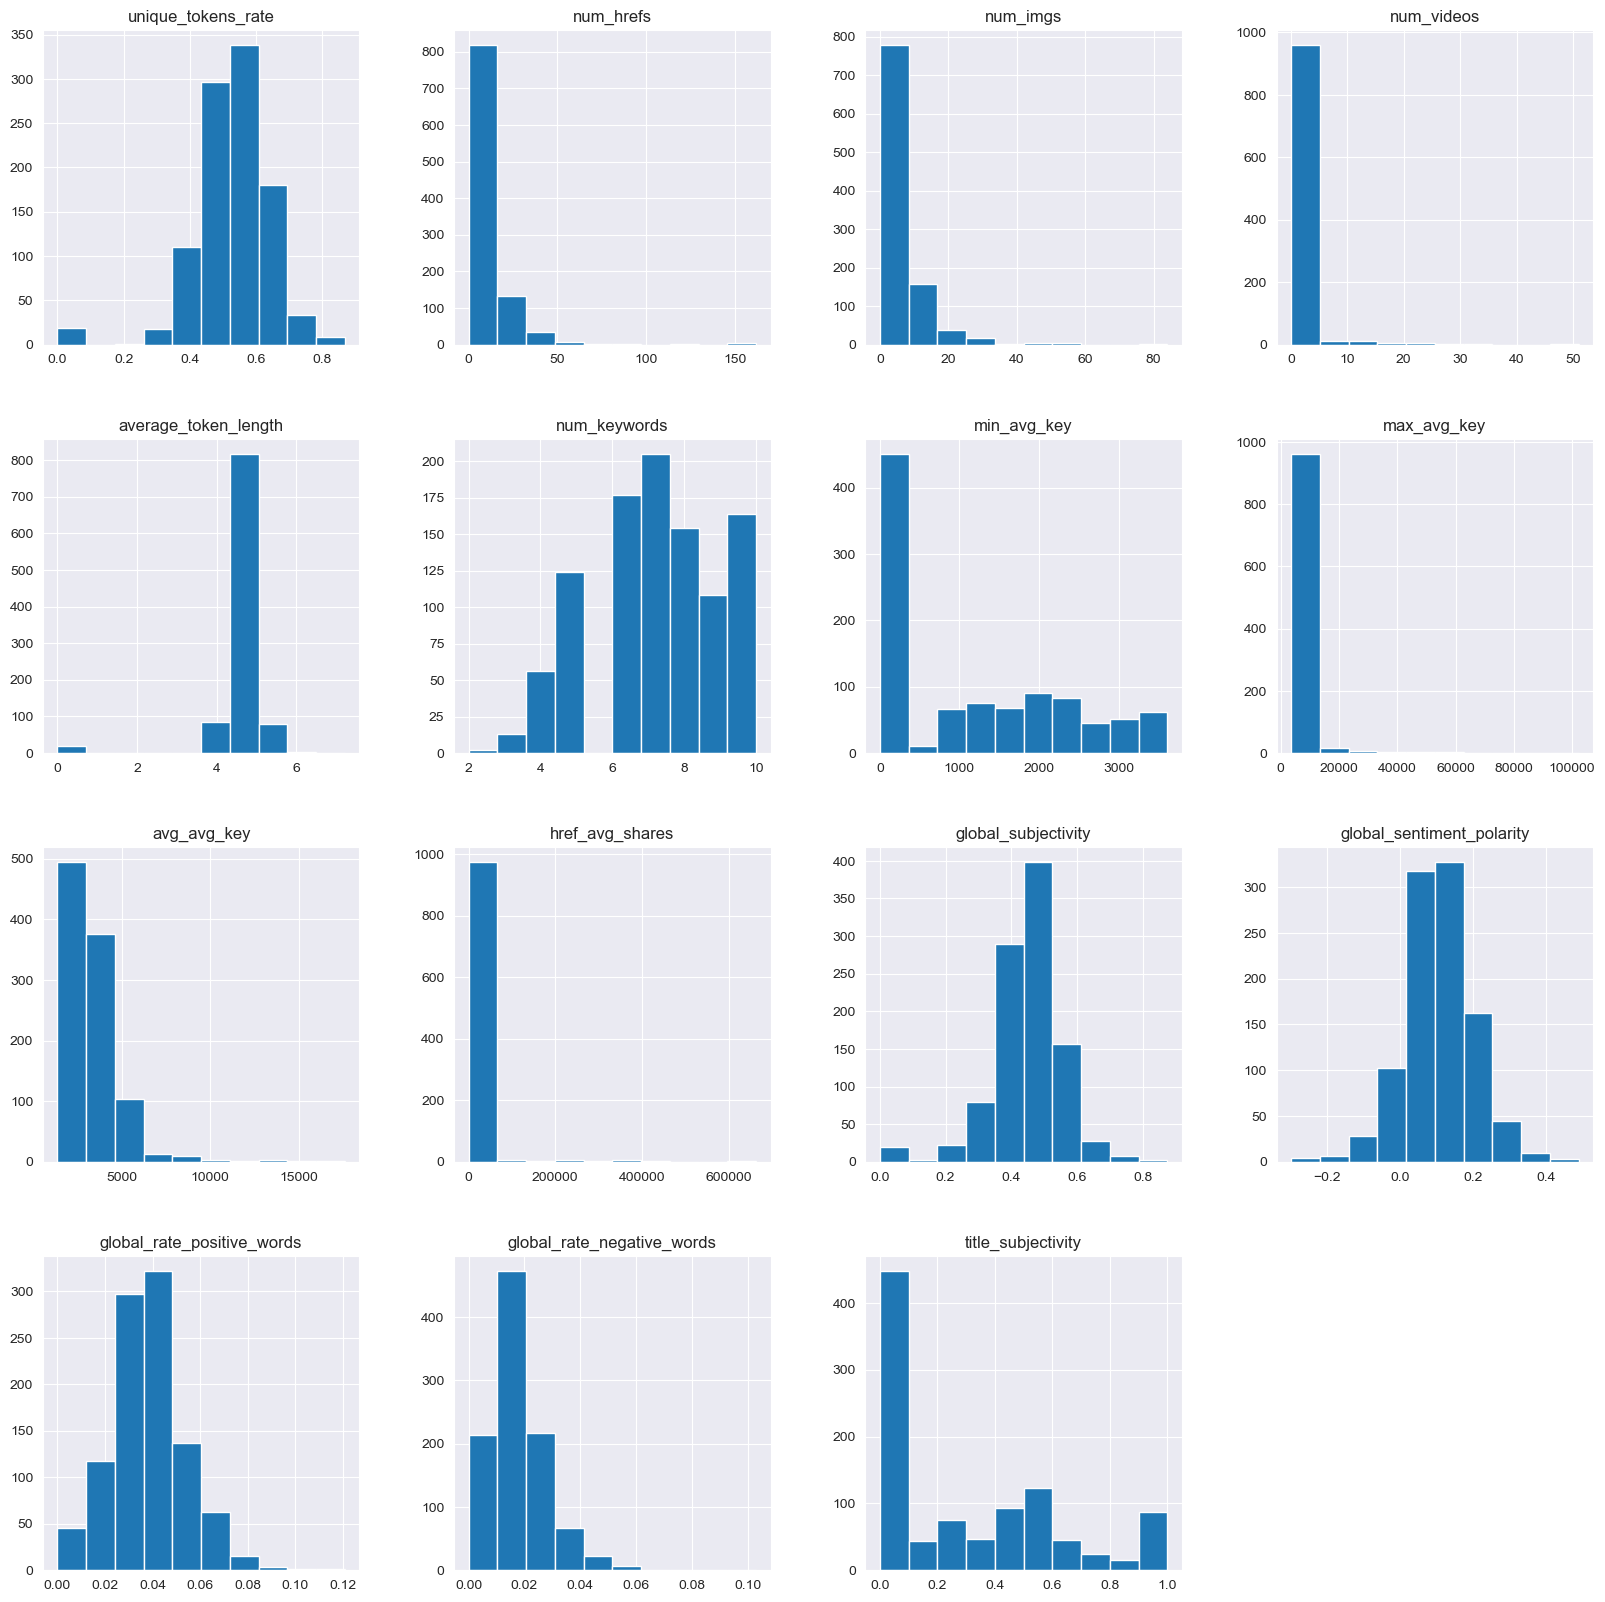

In [84]:
fields = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key', 'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'title_subjectivity']
df_clean.hist(fields, figsize=(20,20))

Some of the fields look normally distributed while others don't. href_avg_shares, num_videos, max_avg_key all seem very far from being normally distributed.

In [85]:
df_clean[['href_avg_shares', 'num_videos', 'max_avg_key']].describe()

,href_avg_shares,num_videos,max_avg_key
count,1003.000000,1003.000000,1003.000000
mean,13518.302031,1.215354,6463.258234
std,51499.106509,4.079730,7455.421154
min,0.000000,0.000000,3568.870000
25%,1300.000000,0.000000,3613.040000
50%,2766.667000,0.000000,4635.807000
75%,7341.000000,1.000000,6561.910000
max,663600.000000,51.000000,102200.000000


<AxesSubplot:>

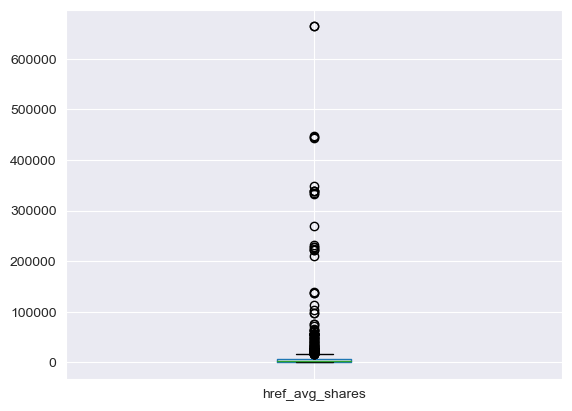

In [86]:
df_clean[['href_avg_shares']].boxplot()

<AxesSubplot:>

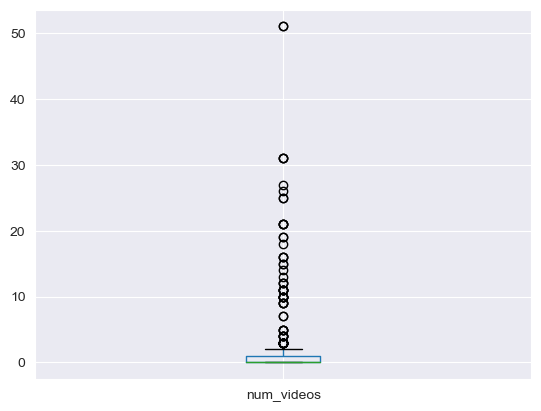

In [87]:
df_clean[['num_videos']].boxplot()

<AxesSubplot:>

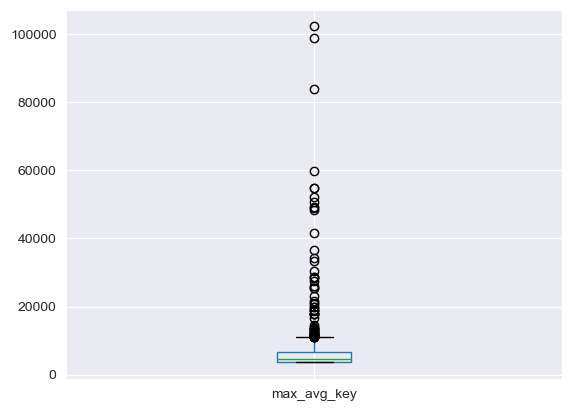

In [88]:
df_clean[['max_avg_key']].boxplot()

As can be seen in the box plots above, the fields all have a high number of outliers.

In [89]:
df_clean['shares'].describe()

count      1003.000000
mean       4247.304088
std       22609.634435
min          58.000000
25%        1000.000000
50%        1600.000000
75%        3100.000000
max      663600.000000
Name: shares, dtype: float64

<AxesSubplot:>

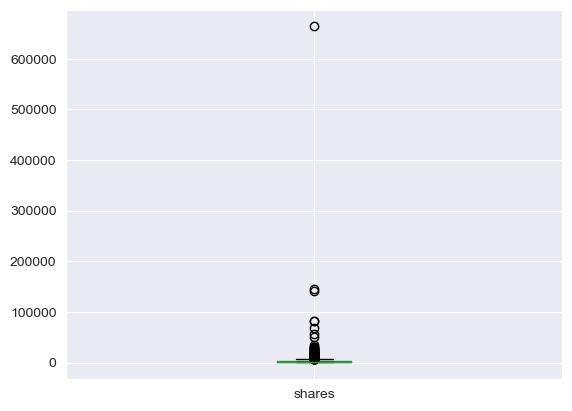

In [90]:
df_clean[['shares']].boxplot()

The target variable too seems to have a significant number of outliers.

<h3>Multivariate Analysis</h3>

In this section, we look to see correlation between the various fields with the target variable 'shares'. In addition, we also look at how shares vary with the date of publication and data channels.

<AxesSubplot:xlabel='published_date_cleaned', ylabel='shares'>

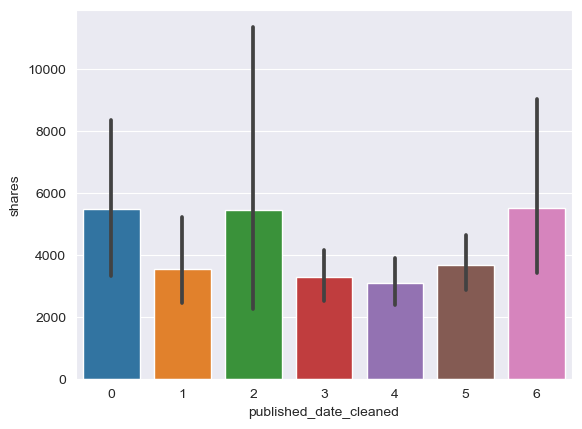

In [91]:
# Comparison of shares for each day of the week
sns.barplot(x= df_clean.set_index('published_date_cleaned').index.day_of_week,y=df_clean['shares'])

It does not look significant, but articles on Monday do seem to have the highest shares.

<AxesSubplot:xlabel='data_channel_cleaned', ylabel='shares'>

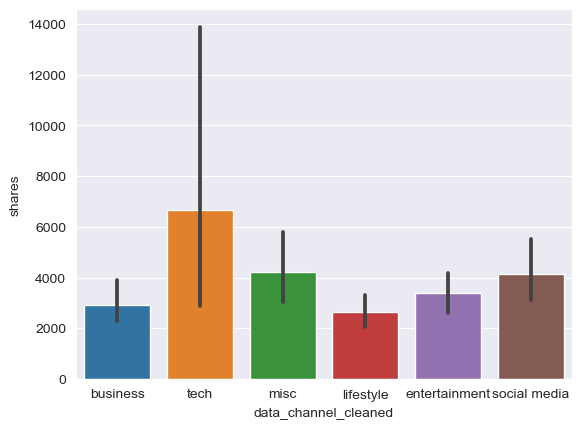

In [92]:
# Barplot showing which data channel is associated with the highest number of shares
sns.barplot(x=df_clean['data_channel_cleaned'], y=df_clean['shares'])

The tech articles clearly have the most shares in the bar graph above.

In [93]:
# Showing correlation coefficient for each of the variables with the target 'shares'
corr_matrix = df_clean.corr()
print(corr_matrix['shares'])

article_id                    0.012057
unique_tokens_rate           -0.060329
num_hrefs                     0.077955
num_imgs                     -0.008089
num_videos                   -0.001938
average_token_length         -0.000077
num_keywords                  0.044015
min_avg_key                  -0.010040
max_avg_key                  -0.003706
avg_avg_key                   0.015171
href_avg_shares               0.018945
global_subjectivity           0.022757
global_sentiment_polarity    -0.025610
global_rate_positive_words   -0.019037
global_rate_negative_words    0.004837
title_subjectivity            0.021480
title_sentiment_polarity      0.024815
shares                        1.000000
business                     -0.026119
entertainment                -0.018053
lifestyle                    -0.016357
misc                         -0.001566
social media                 -0.001175
tech                          0.053434
Name: shares, dtype: float64


None of the fields have a correlation coefficient of magnitude 0.1 or higher. They all seem not to be correlated with the target variable 'shares'.

In [94]:
df_clean

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,title_sentiment_polarity,shares,published_date_cleaned,data_channel_cleaned,business,entertainment,lifestyle,misc,social media,tech
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,1459.500,...,0.250000,1600,2014-03-31,business,1,0,0,0,0,0
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4,1,0,4.636704,7,0.000,...,0.000000,1500,2014-04-01,tech,0,0,0,0,0,1
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8,1,0,4.627451,7,2270.889,...,0.000000,1400,2014-04-01,tech,0,0,0,0,0,1
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4,1,0,5.083665,9,0.000,...,0.000000,1300,2014-04-01,tech,0,0,0,0,0,1
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6,9,0,4.336022,7,3581.094,...,0.000000,3000,2014-04-01,misc,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6,2,0,4.913978,4,3329.921,...,0.000000,1300,2014-04-17,business,1,0,0,0,0,0
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4,2,0,4.674627,6,0.000,...,0.000000,1100,2014-04-17,tech,0,0,0,0,0,1
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3,0,2,4.177665,9,2126.118,...,-0.600000,4400,2014-04-17,entertainment,0,1,0,0,0,0
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7,1,0,4.667961,8,0.000,...,0.433333,1900,2014-04-17,business,1,0,0,0,0,0


In [95]:
df_clean.to_csv('../data/articles_clean.csv')